In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import gudhi as gd
from tqdm.notebook import tqdm

import matplotlib
import seaborn as sns
import scipy.spatial.distance as ds
sns.set()
sns.set_context("talk", font_scale = 1.5)
sns.set_style('whitegrid')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['axes.axisbelow'] = True
#matplotlib.rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['figure.figsize'] = [10, 7]

In [2]:
from scipy.integrate import quad

#Create 2-D Gaussian Random Field Image

def GausField(sigma):
    im = gaussian_filter(np.random.normal(0,1,(100,100)), sigma = sigma, mode = 'wrap')
    return im/(np.sqrt(np.mean(im**2)))

#Gaussian Tail Probability Calculation
def tail(x):
    return np.exp(-(x**2)/2)
def tailprob(a):
    val = quad(tail,a,np.inf)[0]
    return (2*np.pi)**(-.5)*val

#Compute Expected EC
def ExpEC(a,T,lam):
    L2 = (T**2*lam)/((2*np.pi)**(3/2))
    L1 = (2*T*lam**(.5))/((2*np.pi))
    EEC = (L2*a + L1)*np.exp((-(a)**2)/2) + tailprob(a)
    return EEC

# function returns an euler characteristic curve for a given image
def getEC(data):
    cubeplex = gd.CubicalComplex(dimensions  = [np.shape(data)[0],np.shape(data)[1]],top_dimensional_cells=np.ndarray.flatten(data));
    cubeplex.compute_persistence();
    b = np.zeros( (numPoints,2) ) ;
    ec = np.zeros(numPoints);
    for (i,fval) in enumerate(np.flip(filtrations)):
        betti = cubeplex.persistent_betti_numbers(fval,fval);
        b[i] = [betti[0], betti[1]];
        ec[i] = betti[0] - betti[1];
    return ec;

In [3]:
# define filtration range and increments
numPoints = 1000;
filtrationStart = -4;
filtrationEnd = 4;
filtrations = np.linspace(filtrationStart,filtrationEnd,numPoints);

In [4]:
data2 = []
data3 = []

sigma2 = 3
sigma3 = 4

for i in range(500):
    data2.append(GausField(sigma2))
    
for i in range(500):
    data3.append(GausField(sigma3))

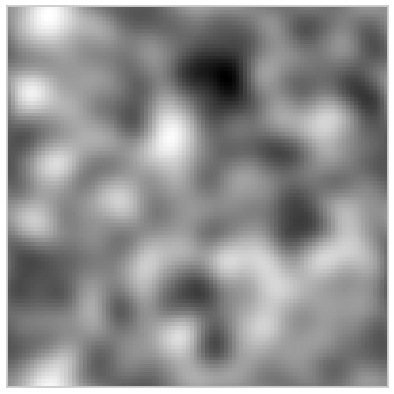

In [5]:
plt.imshow(data2[5],cmap = "gray",origin = "lower")
plt.grid(False)

for i in range(6):
    plt.imshow(data2[i],cmap = "gray",origin = "lower")
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
#     plt.savefig("sig2{}.svg".format(i), transparent = True)

for i in range(6):
    plt.imshow(data3[i],cmap = "gray",origin = "lower")
    plt.grid(False)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
#     plt.savefig("sig3{}.svg".format(i),transparent = True)

In [6]:
EC2 = []
EC3 = []

for i in tqdm(data2):
    EC2.append(getEC(i))
    
for i in tqdm(data3):
    EC3.append(getEC(i))

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

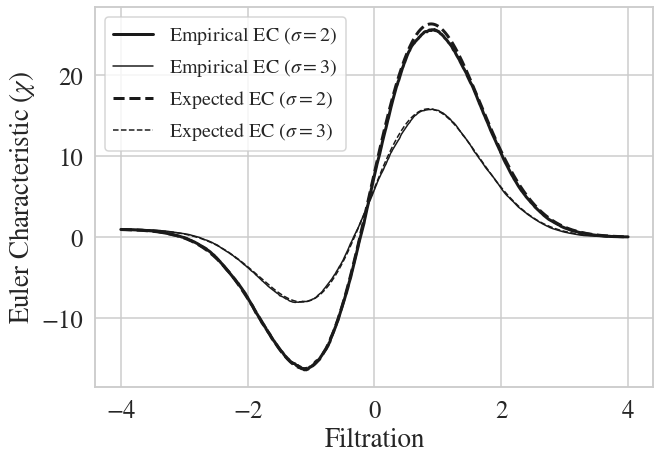

In [7]:
EECC2 = []
for i in filtrations:
    EECC2.append(ExpEC(i,100,(1/((sigma2**2)*2))))
    
EECC3 = []
for i in filtrations:
    EECC3.append(ExpEC(i,100,(1/((sigma3**2)*2))))
    
EC2avg = np.mean(EC2,axis=0)    
EC3avg = np.mean(EC3,axis=0) 

plt.plot(filtrations,EC2avg,'k',linewidth = 3, label = r"Empirical EC ($\sigma = 2$)")
plt.plot(filtrations,EC3avg,'k', linewidth = 1.5, label = r"Empirical EC ($\sigma = 3$)")
plt.plot(filtrations,EECC2,'--k',linewidth = 3,  label = "Expected EC ($\sigma = 2$)")
plt.plot(filtrations,EECC3,'--k',linewidth = 1.5, label = "Expected EC ($\sigma = 3$)")

plt.legend(fontsize = 20)


plt.ylabel(r"Euler Characteristic ($\chi$)")
plt.xlabel("Filtration")

plt.savefig("empvs.exp.pdf")

In [8]:
# function returns an euler characteristic curve for a given image
def getEC(data):
    cubeplex = gd.CubicalComplex(dimensions  = [np.shape(data)[0],np.shape(data)[1]],top_dimensional_cells=np.ndarray.flatten(data));
    cubeplex.compute_persistence();
    b = np.zeros( (numPoints,2) ) ;
    ec = np.zeros(numPoints);
    for (i,fval) in enumerate(np.flip(filtrations)):
        betti = cubeplex.persistent_betti_numbers(fval,fval);
        b[i] = [betti[0], betti[1]];
        ec[i] = betti[0] - betti[1];
    return b;

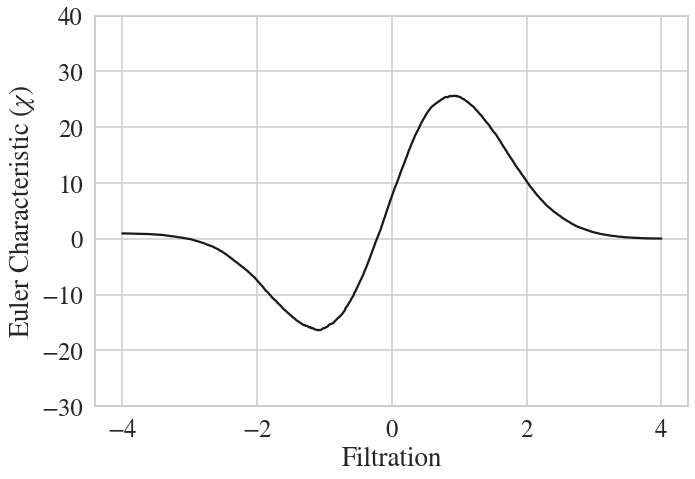

In [55]:
sns.set_style("whitegrid")
# sns.set_palette('pastel')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['figure.autolayout']=True

plt.ylabel("Euler Characteristic ($\chi$)")
plt.xlabel("Filtration")

plt.plot(filtrations,EC2avg,'k')

plt.ylim(-30,40)

plt.savefig("curveeul.svg",transparent = True)

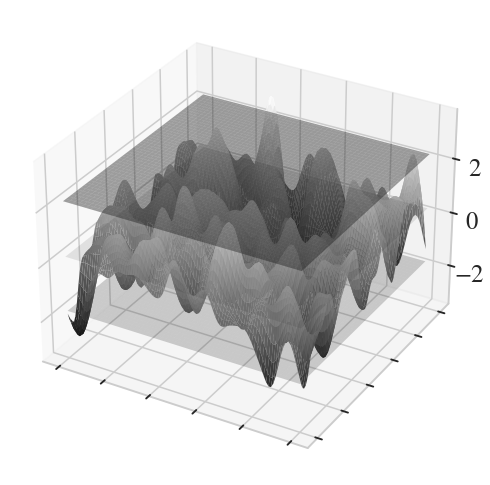

In [31]:

x = np.linspace(0,1,100)
x, y = np.meshgrid(x, x)

# sns.set_palette('pastel')
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['figure.autolayout']=True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.tight_layout()

plane1 = np.zeros((100,100))+2.3

ax.plot_surface(x, y, data2[10], color='0.75', rstride=1, cstride=1,cmap = 'gray',linewidth = 0)

ax.plot_surface(x,y,plane1,alpha = .4, color = 'k', linewidth = 0)

ax.plot_surface(x,y,plane1-2,alpha = .1, color = 'k',linewidth = 0)

ax.plot_surface(x,y,plane1-4,alpha = .2, color = 'k',linewidth = 0)

plt.setp(ax.get_xticklabels(), visible=False)

plt.setp(ax.get_yticklabels(), visible=False)

# plt.setp(ax.get_zticklabels(), visible=False)

# ax.set_zlim(.2,.8)

plt.savefig("morse_3d_plane.svg",transparent = True)

In [33]:
Unans = []

for i in filtrations:
    datanan = np.array(data2[10])
    b = data2[10] >= i
    datanan[~b] = np.nan
    Unans.append(datanan)

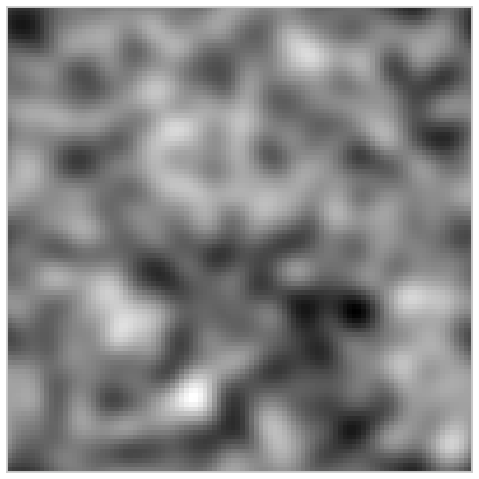

In [66]:
plt.imshow(Unans[0],cmap = "gray")
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.grid(False)

plt.savefig("thresh3.svg",transparent = False)